# **UJIAN AKHIR SEMESTER - DATA MINING & DATA WAREHOUSE**
## BMI PREDICT ANALYSIS 🏃
Informasi Kelompok ✋
- 🧑 Mochammad Qaysa Al-Haq - 9882405222111004
- 🧑 Tony Heru Susanto - 9882405222111***

##Informasi Dataset :
Dataset yang dipakai : [gym_members_exercise_tracking.csv](https://www.kaggle.com/datasets/utcurseyu/gym-dataset/data)






[![Bukti 0 Upvotes](https://raw.githubusercontent.com/mochammadqaysa/bmi-predict-analysis/refs/heads/main/bukti0upvotes.png "Bukti 0 Upvotes")](https://www.kaggle.com/datasets/utcurseyu/gym-dataset/data/ "Bukti 0 Upvotes")

## **Memanggil semua library/package yang dibutuhkan 📦**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import kendalltau, spearmanr, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from plotly.subplots import make_subplots

## **Proses Data Wrangling 👟**
### Gathering Data 👪

* Dataframe **gym_members_df** yang diperoleh dari **gym_member_exercise_tracking.csv**


In [ ]:
gym_members_df = pd.read_csv("https://raw.githubusercontent.com/mochammadqaysa/bmi-predict-analysis/refs/heads/main/gym_members_exercise_tracking.csv")
gym_members_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


### Assessing Data 🎓

1. Dataframe **gym_member_exercise_tracking**

* **Cek Tipe Data & Jumlah Data**


In [ ]:
gym_members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int



> Berdasarkan informasi detail struktur dataframe **gym_members_df**, tidak terdapat **missing value** dan tipe data pada setiap kolom sudah sesuai



In [ ]:
gym_members_df.isna().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


* **Cek Duplikasi Data**

In [ ]:
print("Jumlah duplikasi data: ", gym_members_df.duplicated().sum())

Jumlah duplikasi data:  0


> Berdasarkan informasi missing value dan duplikasi data, maka pada dataframe **gym_members_df** tidak terdapat **missing value** dan **duplikasi data**

* **Ringkasan Parameter Statistik**

In [ ]:
gym_members_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


## **Proses Exploratory Data Analysis 👟**
### Eksplorasi Data **gym_members_df** 🚴

* **Ringkasan Parameter Statistik dengan kolom kategoris**

In [ ]:
gym_members_df.describe(include="all")

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973,973.000000,973.000000,973.000000,973.000000,973.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strength,NaN,NaN,NaN,NaN,NaN
freq,NaN,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258,NaN,NaN,NaN,NaN,NaN
mean,38.683453,NaN,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,NaN,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,NaN,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,NaN,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,NaN,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,NaN,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,NaN,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,NaN,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,NaN,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,NaN,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,NaN,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,NaN,29.300000,3.100000,4.000000,2.000000,28.560000


* **Rata-rata Skor BMI Berdasarkan Umur**

In [ ]:
gym_members_df.groupby('Age').agg({
    'BMI': ['mean']
})

,BMI
,mean
Age,
18,25.454815
19,24.057692
20,26.898400
21,26.526000
22,25.596667
23,24.839600
24,21.764667
25,23.290769


* **Rata-rata Skor BMI Berdasarkan Gender**

In [ ]:
gym_members_df.groupby('Gender').agg({
    'BMI': ['mean']
})

,BMI
,mean
Gender,
Female,22.727835
Male,26.886967


* **Frekuensi Nilai Unik Pada Kolom Kategorikal & Kolom BMI**

In [ ]:
gym_members_df['Workout_Type'].value_counts()

,count
Workout_Type,
Strength,258
Cardio,255
Yoga,239
HIIT,221


In [ ]:
gym_members_df['Gender'].value_counts()

,count
Gender,
Male,511
Female,462


In [ ]:
gym_members_df['BMI'].value_counts()

,count
BMI,
23.53,5
23.88,4
22.48,4
26.47,4
21.16,4
...,...
14.88,1
15.07,1
14.36,1


* **Feature Engineering pada kolom BMI**

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

gym_members_df['BMI_Category'] = gym_members_df['BMI'].apply(bmi_category)

In [ ]:
gym_members_df['BMI_Category'].value_counts()

,count
BMI_Category,
Normal,366
Overweight,238
Obese,201
Underweight,168


* **Korelasi Fitur Antar Fitur Numerik**

1. Metode Pearson

In [ ]:
numeric_cols = gym_members_df.select_dtypes(include=[np.number]).columns
df_corr = gym_members_df[numeric_cols].corr('pearson')
fig = px.imshow(df_corr, text_auto=True,
                color_continuous_scale=px.colors.sequential.PuBu,
                width = 1500, height = 900, aspect="auto",title="Korelasi Pearson")
fig.update_layout(
    title_x=0.5
)
fig.show()

2. Metode Kendall

In [ ]:
numeric_cols = gym_members_df.select_dtypes(include=[np.number]).columns
df_corr = gym_members_df[numeric_cols].corr('kendall')
fig = px.imshow(df_corr, text_auto=True,
                color_continuous_scale=px.colors.sequential.PuBu,
                width = 1500, height = 900, aspect="auto",title="Korelasi Kendall")
fig.update_layout(
    title_x=0.5
)
fig.show()

3. Metode Spearman

In [ ]:
numeric_cols = gym_members_df.select_dtypes(include=[np.number]).columns
df_corr = gym_members_df[numeric_cols].corr('spearman')
fig = px.imshow(df_corr, text_auto=True,
                color_continuous_scale=px.colors.sequential.PuBu,
                width = 1500, height = 900, aspect="auto",title="Korelasi Spearman")
fig.update_layout(
    title_x=0.5
)
fig.show()

In [ ]:
cat_cols = gym_members_df.select_dtypes(include=[np.number]).columns
chi_square_results = {}
for col in cat_cols:
    contingency = pd.crosstab(gym_members_df['BMI'], gym_members_df[col])
    chi2, p, dof, ex = chi2_contingency(contingency)
    chi_square_results[col] = p

<ipython-input-80-b972b70333ee>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




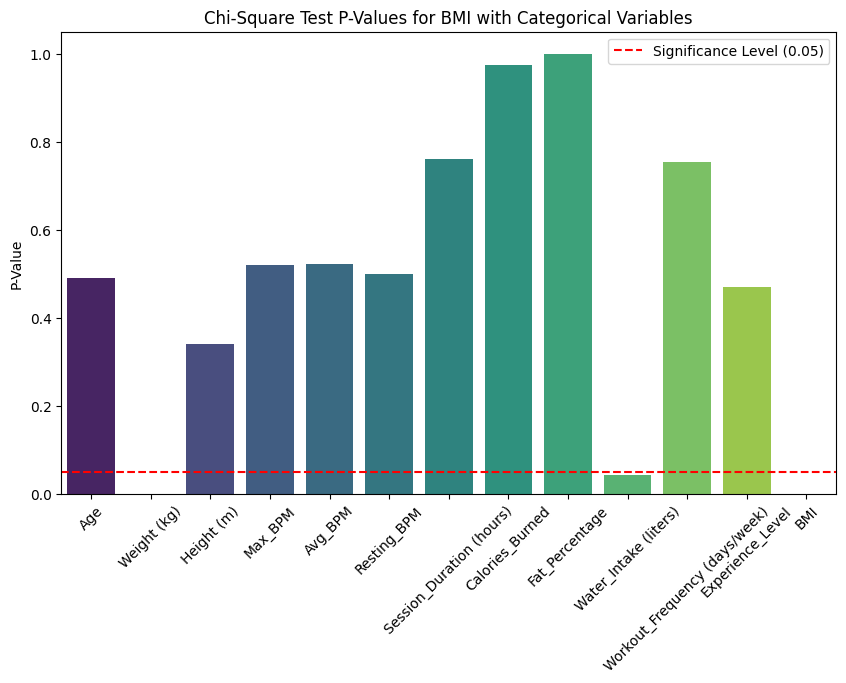

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(chi_square_results.keys()), y=list(chi_square_results.values()), palette='viridis')
plt.axhline(0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.ylabel('P-Value')
plt.title('Chi-Square Test P-Values for BMI with Categorical Variables')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
fig = px.pie(values = gym_members_df['BMI_Category'].value_counts().values, names= gym_members_df['BMI_Category'].value_counts().index, hole=0.3)
fig.update_layout(
      height=600,
      width = 800,
      showlegend=True,
      #title_text="<b>{} xx<b>",
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()



> Function untuk EDA



In [ ]:
def create_hist(col):
  fig = px.histogram( x = gym_members_df[col].apply(int), color = gym_members_df['BMI_Category'], histnorm = 'percent',opacity = 0.5)
  fig.update_layout(width = 900,barmode = 'overlay',legend_title_text='Segmentasi BMI')
  fig.update_xaxes(title = '')
  return fig

def create_bar(col):
  fig = px.histogram(gym_members_df,x = col,color = 'BMI_Category',histnorm = 'percent')
  fig.update_layout(width = 900,barmode = 'group',legend_title_text='Segmentasi BMI')
  fig.update_xaxes(title = '')
  return fig

def create_pie(col) :
  fig = make_subplots(
      rows=2, cols=3,subplot_titles=('Total Member','Normal','Overweight','Obese','Underweight'),
      vertical_spacing=0.09,
      specs=[[{"type": "pie","rowspan": 2}       ,{"type": "pie"},                 {"type": "pie"}],
            [None,                                {"type": "pie"},                 {"type": "pie"}]
            ]
  )
  fig.add_trace(
      go.Pie(values=gym_members_df[col].value_counts().values,
            labels=gym_members_df[col].value_counts().index,
            pull=[0.01,0.01],
            hole=0.3),
      row=1, col=1
  )
  fig.add_trace(
      go.Pie(
      labels=gym_members_df.query('BMI_Category=="Normal"')[col].value_counts().index,
      values=gym_members_df.query('BMI_Category=="Normal"')[col].value_counts().values,
      pull=[0.01,0.01],
      hole=0.3),
      row=1, col=2
  )

  fig.add_trace(
      go.Pie(
          labels=gym_members_df.query('BMI_Category=="Overweight"')[col].value_counts().index,
          values=gym_members_df.query('BMI_Category=="Overweight"')[col].value_counts().values,
          pull=[0.01,0.01],
          hole=0.3),
      row=1, col=3
  )

  fig.add_trace(
      go.Pie(
          labels=gym_members_df.query('BMI_Category=="Obese"')[col].value_counts().index,
          values=gym_members_df.query('BMI_Category=="Obese"')[col].value_counts().values,
          pull=[0.01,0.01],
          hole=0.3),
      row=2, col=2
  )

  fig.add_trace(
      go.Pie(
          labels=gym_members_df.query('BMI_Category=="Underweight"')[col].value_counts().index,
          values=gym_members_df.query('BMI_Category=="Underweight"')[col].value_counts().values,
          pull=[0.01,0.01],
          hole=0.3),
      row=2, col=3
  )

  fig.update_layout(
      height=800,
      width = 1000,
      showlegend=True,
      #title_text="<b>{} Distribution<b>",
  )
  fig.update_traces(textposition='inside', textinfo='percent+label')
  return fig

def create_hist_group(col):
  fig = px.histogram(x = gym_members_df[col].sort_values().astype(str), color = gym_members_df['BMI_Category'], histnorm = 'percent')#,opacity = 0.5
  fig.update_layout(width = 1200,barmode = 'group',legend_title_text='')
  fig.update_xaxes(title = f'Persentase BMI terhadap {col}')
  return fig



### **Persentase Frekuensi Umur Terhadap Segmentasi BMI**

In [ ]:
create_hist('Age')

### **Persentase Frekuensi Gender Terhadap Segmentasi BMI**

In [ ]:
create_bar('Gender')

### **Persentase Frekuensi Tipe Workout Terhadap Segmentasi BMI**

In [ ]:
create_pie('Workout_Type')

## **Persiapan Data Modelling 🚆**

### Supervised Learning (klasifikasi) 🏨

In [ ]:
X = gym_members_df.drop(['BMI','BMI_Category'],axis=1)
y = gym_members_df['BMI_Category']

In [ ]:
X.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1


* **One Hot Encoding Pada Kolom Kategorikal**

In [ ]:
workout_type = { 'Strength':1,'Cardio':2, 'Yoga':3, 'HIIT':4}
X['Workout_Type'] = X["Workout_Type"].replace(workout_type)

<ipython-input-116-090df5589725>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
gender_type = {'Female':0,'Male':1}
X['Gender'] = X["Gender"].replace(gender_type)

<ipython-input-117-0c18e9b39967>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
X.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3
1,46,0,74.9,1.53,179,151,66,1.30,883.0,4,33.9,2.1,4,2
2,32,0,68.1,1.66,167,122,54,1.11,677.0,2,33.4,2.3,4,2
3,25,1,53.2,1.70,190,164,56,0.59,532.0,1,28.8,2.1,3,1
4,38,1,46.1,1.79,188,158,68,0.64,556.0,1,29.2,2.8,3,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler() #scale data to normal
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,random_state = 25)

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
precision_0_scorer=make_scorer(precision_score,pos_label='no')

In [ ]:
def evaluate_model_cv(model, X, y, cv=4):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=25)
    accuracy, precision, recall, f1 = [], [], [], []
    conf_matrices = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices.append(cm)

    results = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Mean': [np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(f1)],
        'Standard Deviation': [np.std(accuracy), np.std(precision), np.std(recall), np.std(f1)]
    })

    # Plot Confusion Matrices
    for i, cm in enumerate(conf_matrices):
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for Fold {i+1}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    return results

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

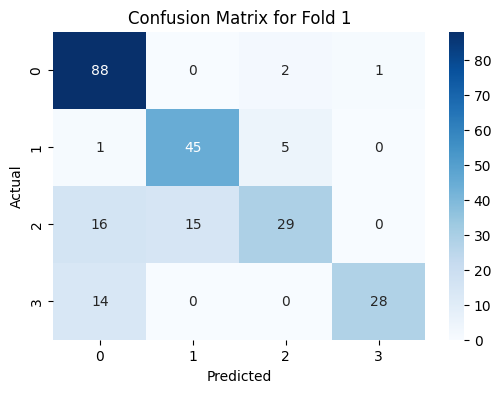

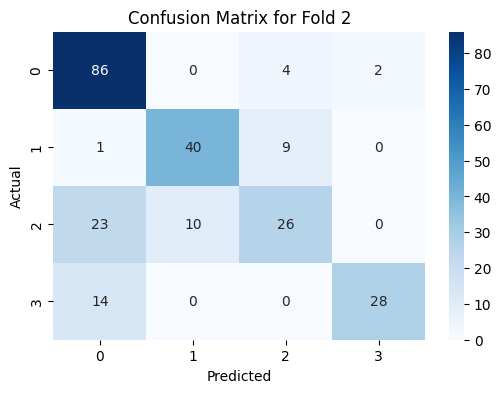

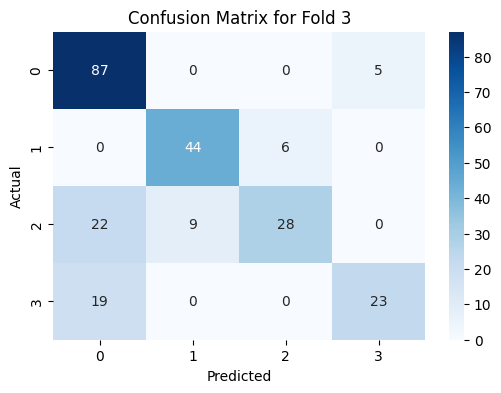

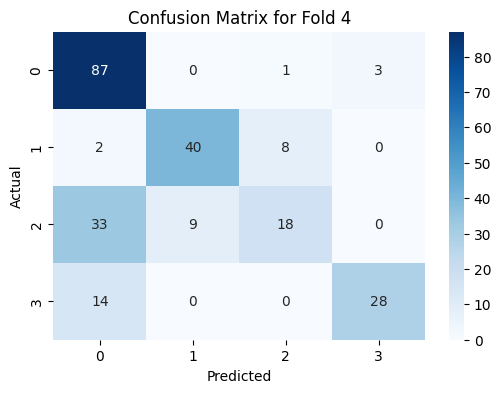

      Metric      Mean  Standard Deviation
0   Accuracy  0.745084            0.023781
1  Precision  0.761385            0.025258
2     Recall  0.745084            0.023781
3   F1-Score  0.729705            0.027862


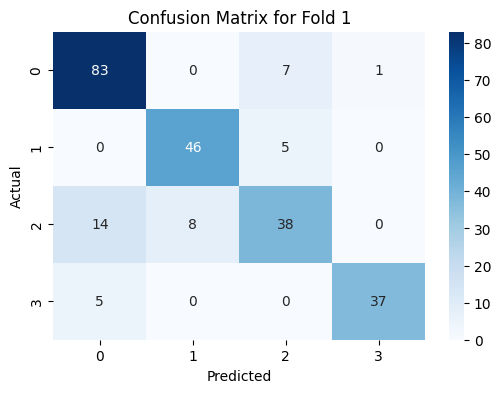

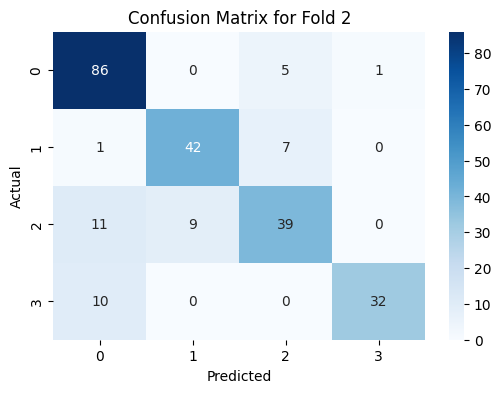

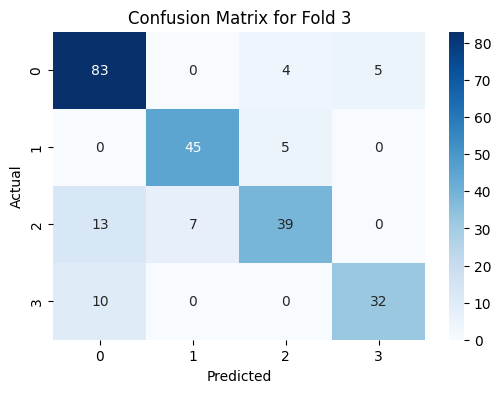

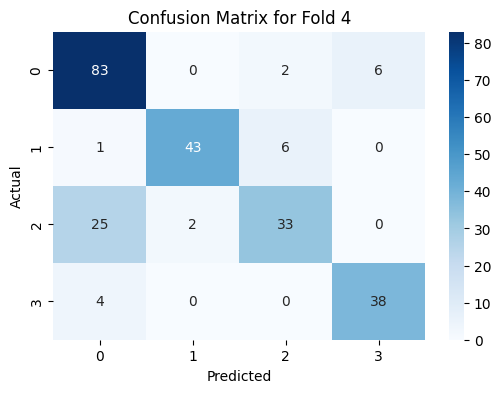

      Metric      Mean  Standard Deviation
0   Accuracy  0.821156            0.009240
1  Precision  0.825294            0.006399
2     Recall  0.821156            0.009240
3   F1-Score  0.817621            0.009985


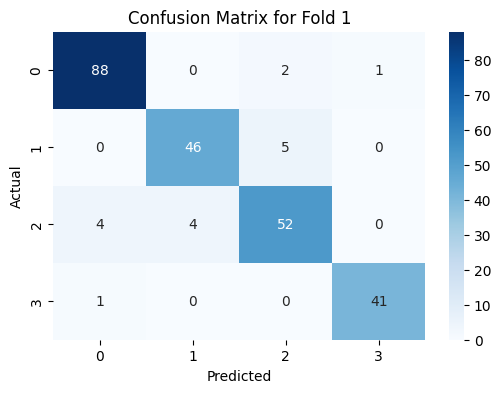

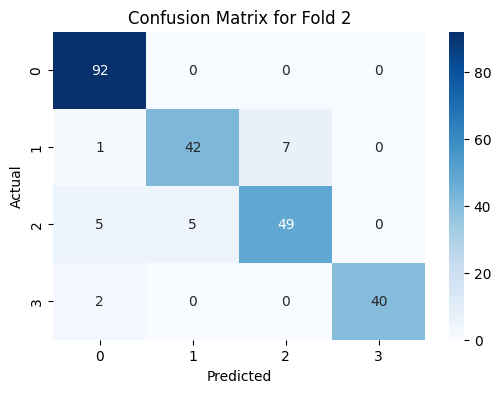

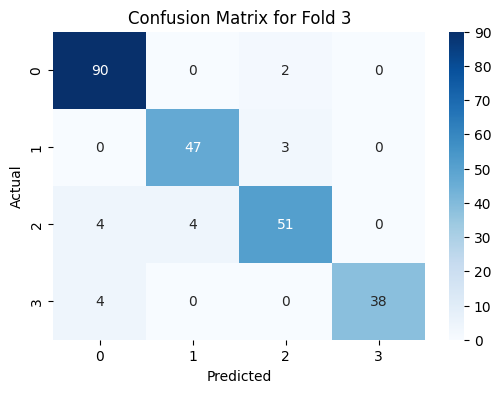

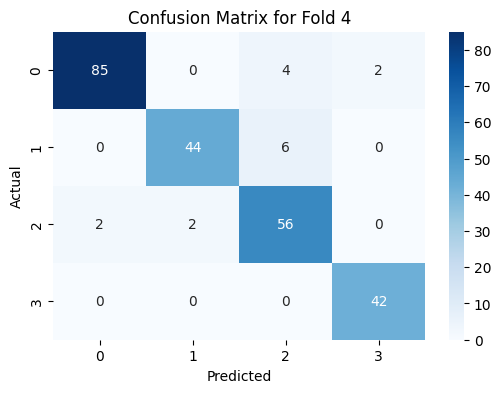

      Metric      Mean  Standard Deviation
0   Accuracy  0.928055            0.006198
1  Precision  0.928970            0.007174
2     Recall  0.928055            0.006198
3   F1-Score  0.927725            0.006734


In [ ]:
from IPython.display import display, HTML

for idx, (name, model) in enumerate(models.items(), start=1):
    display(HTML(f'<br><b style="font-size: 20px;">{idx}. Model: {name}</b>'))

    performance = evaluate_model_cv(model, X, y)

    print(performance)